<a href="https://colab.research.google.com/github/alialmulla97/PV-Energy-Output-Regression/blob/main/PV_Energy_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Photovoltaic Energy Output Predictor in Shagaya Renewable Energy Park

## The Challenge
As the world transitions toward renewable energy, Kuwait, an oil-rich nation, remains heavily reliant on non-renewable resources for electricity production, with a staggering 99.6% of its electricity coming from such sources. Only 0.4% of Kuwait's electricity is derived from renewable energy, specifically from the Shagaya Renewable Energy Park. This park integrates three renewable technologies: Concentrated Solar Power (CSP), Wind, and Photovoltaic (PV) systems.

This project focuses solely on the PV technology due to Kuwait's high solar irradiance, which provides more direct sunlight hours than the global average. Within PV, two distinct technologies are employed: polycrystalline panels with an installed capacity of 315W per panel (18,820 panels of model JKM315PP-72 from Jinko Solar) and thin film panels with an installed capacity of 160W per panel (34,560 panels of model SF160-S from Solar Frontier).

The primary goal of this project is to develop a predictive model for PV energy output based on forecasted weather data.

## Predictive Analytical Process
1. **Problem Definition**
2. **Data Collection and Preperation**
3. **Exploratory Data Analysis**
4. **Feature Engineering**
5. **Model Building**
6. **Model Evaluation**
7. **Conclusion**


# Problem Definition
The aim of this project is to develop a machine learning model that predict photovoltaic (PV) energy output based on forecasted weather data. The model will output the energy produced in kilowatt-hours (kWh) on an hourly basis using regression techniques.


# Data Collection and Preperation


## 2.1 Import Libraries

In [117]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For wind rose plots
!pip install windrose
from windrose import WindroseAxes

# For regular expressions
import re

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

## 2.2 Upload Data

In [118]:
# Import data file
energy = pd.read_csv("/content/drive/MyDrive/Data Science Project/PV Energy Predictor/pv_energy_output.csv")

## 2.3 Read Data

In [119]:
# Column information
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Day                                  8760 non-null   int64  
 1   Time                                 8760 non-null   object 
 2   Global Horizon Irradiation           8760 non-null   int64  
 3   Direct Normal Irradiation            8760 non-null   int64  
 4   Diffuse Horizonal Irradiation        8760 non-null   int64  
 5   Sun Azimuth Angle                    8760 non-null   float64
 6   Sun Elevation Angle                  8760 non-null   float64
 7   Air Temp                             8760 non-null   float64
 8   Relative Humidty                     8760 non-null   float64
 9   Wind Speed                           8760 non-null   float64
 10  Wind Direction                       8760 non-null   int64  
 11  Atmospheric Pressure          

In [120]:
# Rename columns
energy.columns = ["day_of_year","time","global_horizon_irradiation",
                  "direct_normal_irradiation","diffuse_horizonal_irradiation",
                  "sun_azimuth_angle","sun_elevation_angle","air_temp","relative_humidity",
                  "wind_speed","wind_direction","atmospheric_pressure","wet_bulb_temperature",
                  "thin_film","polycrystalline"]

In [121]:
# List all missing values
energy.isnull().sum()

,0
day_of_year,0
time,0
global_horizon_irradiation,0
direct_normal_irradiation,0
diffuse_horizonal_irradiation,0
sun_azimuth_angle,0
sun_elevation_angle,0
air_temp,0
relative_humidity,0
wind_speed,0


In [122]:
# Statistical description
energy.describe()

,day_of_year,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8713.000000,8713.000000
mean,183.000000,238.053311,212.001712,97.747489,0.419943,0.311655,25.840765,21.489098,3.956336,168.105365,984.440217,14.746062,1057.931367,1111.775967
std,105.372043,319.370489,275.231914,121.229947,95.112868,41.126024,10.980324,16.154036,1.836954,86.982807,7.378646,6.654681,1784.897597,1933.863497
min,1.000000,0.000000,0.000000,0.000000,-167.900000,-81.900000,0.000000,2.400000,0.100000,0.000000,970.600000,-4.500000,0.000000,0.000000
25%,92.000000,0.000000,0.000000,0.000000,-89.525000,-34.100000,17.000000,9.200000,2.600000,113.000000,977.900000,9.900000,0.000000,0.000000
50%,183.000000,10.000000,5.000000,9.000000,-1.800000,0.950000,26.400000,16.200000,3.700000,136.000000,985.300000,14.900000,0.000000,4.000000
75%,274.000000,479.000000,461.000000,203.000000,88.825000,34.825000,33.700000,29.400000,5.100000,238.000000,990.500000,19.800000,2092.000000,2176.000000
max,365.000000,1037.000000,953.000000,474.000000,163.800000,81.500000,50.100000,91.100000,11.900000,359.000000,1000.600000,30.300000,29984.000000,33104.000000


In [123]:
# Top 5 rows
energy.head()

,day_of_year,time,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
0,1,00:30:00,0,0,0,-97.1,-79.5,9.1,86.4,3.3,141,992.2,8.4,0.0,0.0
1,1,01:30:00,0,0,0,-101.1,-67.8,8.8,87.0,3.0,137,992.1,8.2,0.0,0.0
2,1,02:30:00,0,0,0,-90.9,-54.8,8.7,87.6,2.4,124,992.0,8.0,0.0,0.0
3,1,03:30:00,0,0,0,-84.3,-41.8,7.9,20.9,2.6,135,995.5,0.9,0.0,0.0
4,1,04:30:00,0,0,0,-78.3,-28.9,7.4,20.2,2.7,144,995.6,0.3,0.0,0.0


In [124]:
# Bottom 5 rows
energy.tail()

,day_of_year,time,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
8755,365,19:30:00,0,0,0,79.1,-31.1,11.1,74.8,4.8,132,991.7,9.7,0.0,0.0
8756,365,20:30:00,0,0,0,85.2,-44.1,10.3,80.2,3.9,139,992.1,9.2,0.0,0.0
8757,365,21:30:00,0,0,0,92.3,-57.1,9.8,84.0,3.9,139,992.3,8.9,0.0,0.0
8758,365,22:30:00,0,0,0,103.9,-70.1,9.5,84.9,3.7,139,992.3,8.7,0.0,0.0
8759,365,23:30:00,0,0,0,133.3,-81.0,9.3,85.7,3.3,141,992.2,8.5,0.0,0.0


## 2.4 Convert Columns to Datetime Format

In [125]:
# Convert "day" column to Datetime
energy["date"] = pd.to_datetime(energy["day_of_year"], origin = "2022-01-01", unit = "D")

# Extract day, month, and year
energy["day"] = energy["date"].dt.day
energy["week"] = energy["date"].dt.isocalendar().week
energy["month"] = energy["date"].dt.month
energy["year"] = energy["date"].dt.year

# Drop the intermediate "date" column
energy.drop(columns = ["date"], inplace = True)

# Shifting columns
col = energy.pop("day")
energy.insert(1,"day",col)

col = energy.pop("week")
energy.insert(2,"week",col)

col = energy.pop("month")
energy.insert(3,"month",col)

col = energy.pop("year")
energy.insert(4,"year",col)

In [126]:
# Convert "time" column to Datetime
energy["time"] = pd.to_datetime(energy["time"])

# Extract hour and minute
energy["hour"] = energy["time"].dt.hour
energy["minute"] = energy["time"].dt.minute

# Drop the intermediate "time" column
energy.drop(columns = ["time"], inplace = True)

# Shifting column
col = energy.pop("hour")
energy.insert(5,"hour",col)

col = energy.pop("minute")
energy.insert(6,"minute",col)

In [127]:
energy.sample()

,day_of_year,day,week,month,year,hour,minute,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
7671,320,17,46,11,2022,15,30,42,1,42,56.9,16.1,20.3,12.5,4.1,86,995.1,7.9,1552.0,1772.0


## 2.5 Handle Outlier Values for Thin Film and Polycrystalline Data

In [128]:
# Statistical description before handling outlier and missing values
energy[["thin_film","polycrystalline"]].describe()

,thin_film,polycrystalline
count,8713.000000,8713.000000
mean,1057.931367,1111.775967
std,1784.897597,1933.863497
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,2092.000000,2176.000000
max,29984.000000,33104.000000


<Axes: title={'center': 'Thin Film Energy Ouput (kWh) by Hour'}, xlabel='hour', ylabel='thin_film'>

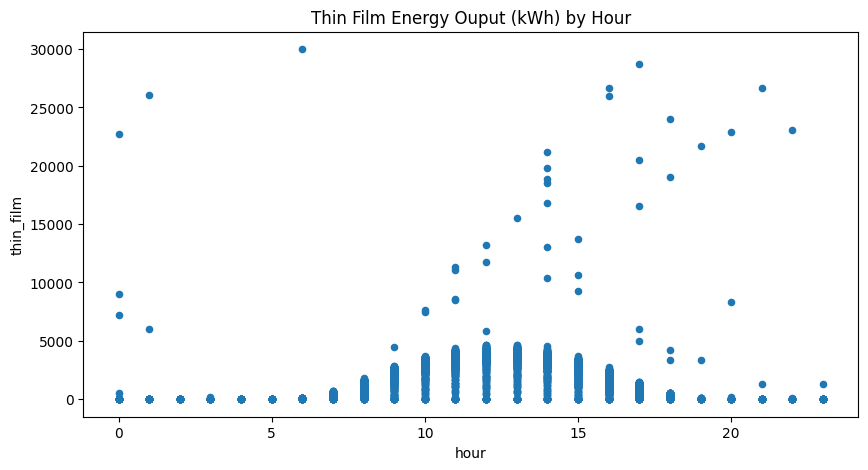

In [129]:
# Scatter plot for thin film energy output (kWh) by hour
energy.plot(kind = "scatter", x = "hour", y = "thin_film", title = "Thin Film Energy Ouput (kWh) by Hour", figsize = (10, 5))

<Axes: title={'center': 'Polycrystalline Energy Ouput (kWh) by Hour'}, xlabel='hour', ylabel='polycrystalline'>

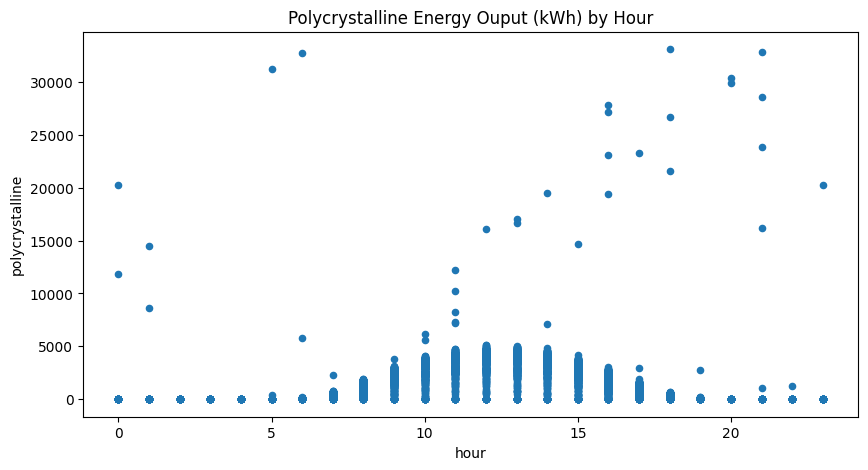

In [130]:
# Scatter plot for polycrystalline energy output (kWh) by hour
energy.plot(kind = "scatter", x = "hour", y = "polycrystalline", title = "Polycrystalline Energy Ouput (kWh) by Hour", figsize = (10, 5))

In [131]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Identify outliers
energy["thin_film_outlier"] = identify_outliers(energy, "thin_film")
energy["polycrystalline_outlier"] = identify_outliers(energy, "polycrystalline")

# Calculate the average energy by hour and month excluding outliers
hour_month_avg_thin_film = energy[~energy["thin_film_outlier"]].groupby(["hour", "month"])["thin_film"].mean().reset_index()
hour_month_avg_polycrystalline = energy[~energy["polycrystalline_outlier"]].groupby(["hour", "month"])["polycrystalline"].mean().reset_index()

# Rename columns for merging
hour_month_avg_thin_film.rename(columns = {"thin_film": "thin_film_avg"}, inplace = True)
hour_month_avg_polycrystalline.rename(columns = {"polycrystalline": "polycrystalline_avg"}, inplace = True)

# Merge the average values back to the original dataframe
energy = energy.merge(hour_month_avg_thin_film, on = ["hour", "month"], how = "left")
energy = energy.merge(hour_month_avg_polycrystalline, on = ["hour", "month"], how = "left")

# Replace outliers with the average values
energy.loc[energy["thin_film_outlier"], "thin_film"] = energy["thin_film_avg"]
energy.loc[energy["polycrystalline_outlier"], "polycrystalline"] = energy["polycrystalline_avg"]

# Drop the temporary columns
energy.drop(columns = ["thin_film_outlier", "thin_film_outlier", "thin_film_avg", "polycrystalline_avg"], inplace = True)

# Reset the index
energy.reset_index(drop = True, inplace = True)

## 2.6 Handle Missing Values for Thin Film and Polycrystalline Data

In [132]:
# Number of missing values before handling it
thin_film_before_mv = energy["thin_film"].isnull().sum()
polycrystalline_before_mv = energy["polycrystalline"].isnull().sum()

In [133]:
def fill_missing_energy(df, column_name):
    for index, row in df[df[column_name].isnull()].iterrows():
        week = row["week"]
        hour = row["hour"]

        # Calculate the average energy for the same hour in the previous week
        prev_week_avg = df[(df["week"] == week - 1) & (df["hour"] == hour)][column_name].mean()

        # Calculate the average energy for the same hour in the next week
        next_week_avg = df[(df["week"] == week + 1) & (df["hour"] == hour)][column_name].mean()

        # Fill the missing value with the average of the previous and next week's average
        df.at[index, column_name] = round((prev_week_avg + next_week_avg) / 2, 1)

    return df

# Fill missing values for thin film energy
energy = fill_missing_energy(energy, "thin_film")

# Fill missing values for polycrystalline energy
energy = fill_missing_energy(energy, "polycrystalline")

In [134]:
# If the sun elevation angle is below 0, no solar energy is being produced
energy.loc[energy["sun_elevation_angle"] < 0, ["thin_film", "polycrystalline"]] = 0

In [135]:
# Number of missing values after handling it
thin_film_after_mv = energy["thin_film"].isnull().sum()
polycrystalline_after_mv = energy["polycrystalline"].isnull().sum()

In [136]:
# Number of missing values before and after handling it
print(f"Number of missing values in Thin Film before handling is {thin_film_before_mv}")
print(f"Number of missing values in Thin Film after handling is {thin_film_after_mv}")
print("-" * 100)
print(f"Number of missing values in Polycrystalline before handling is {polycrystalline_before_mv}")
print(f"Number of missing values in Polycrystalline after handling is {polycrystalline_after_mv}")

Number of missing values in Thin Film before handling is 47
Number of missing values in Thin Film after handling is 0
----------------------------------------------------------------------------------------------------
Number of missing values in Polycrystalline before handling is 47
Number of missing values in Polycrystalline after handling is 0


In [137]:
# Statistical description after handling outlier and missing values
energy[["thin_film","polycrystalline"]].describe()

,thin_film,polycrystalline
count,8760.000000,8760.000000
mean,988.101990,1034.431138
std,1403.904301,1480.106653
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2064.000000,2148.000000
max,5012.000000,5088.000000


# Exploratory Data Analysis

## 3.1 Average Hourly Irradiation (Wh/m²)

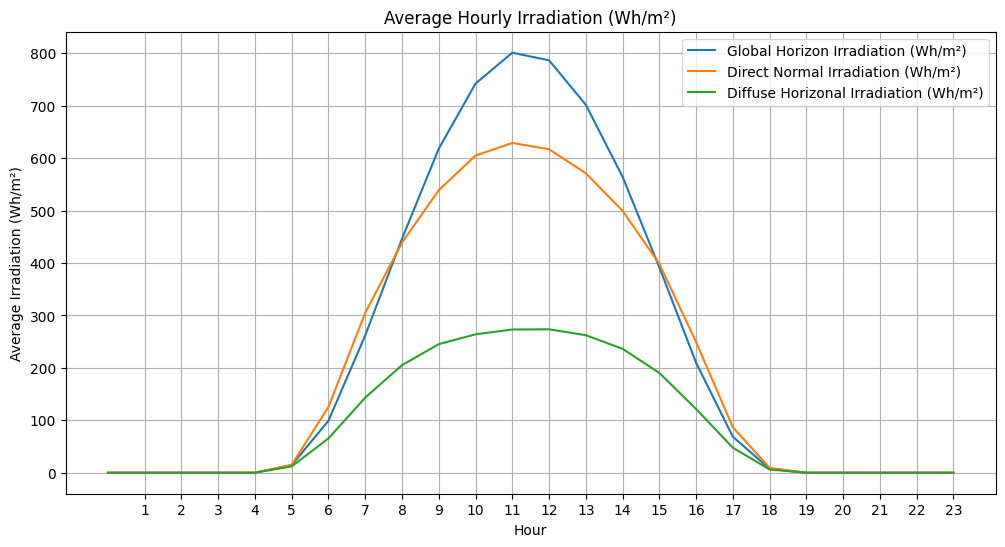

In [138]:
# Calculating the average of global horizon irradiation, direct normal irradiation, and diffuse horizonal irradiation
avg_irradiation_by_month = energy.groupby("hour")[["global_horizon_irradiation","direct_normal_irradiation","diffuse_horizonal_irradiation"]].mean().reset_index()

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the line graph for three types of irradiations
plt.plot(avg_irradiation_by_month["hour"], avg_irradiation_by_month["global_horizon_irradiation"], label = "Global Horizon Irradiation (Wh/m²)")
plt.plot(avg_irradiation_by_month["hour"], avg_irradiation_by_month["direct_normal_irradiation"], label = "Direct Normal Irradiation (Wh/m²)")
plt.plot(avg_irradiation_by_month["hour"], avg_irradiation_by_month["diffuse_horizonal_irradiation"], label = "Diffuse Horizonal Irradiation (Wh/m²)")

# Plot labels
plt.xlabel("Hour")
plt.ylabel("Average Irradiation (Wh/m²)")
plt.title("Average Hourly Irradiation (Wh/m²)")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(1, 24, 1))  # Ensuring all hours are shown on the x-axis
plt.show()

## 3.2 Sun Azimuth Angle by the Hour

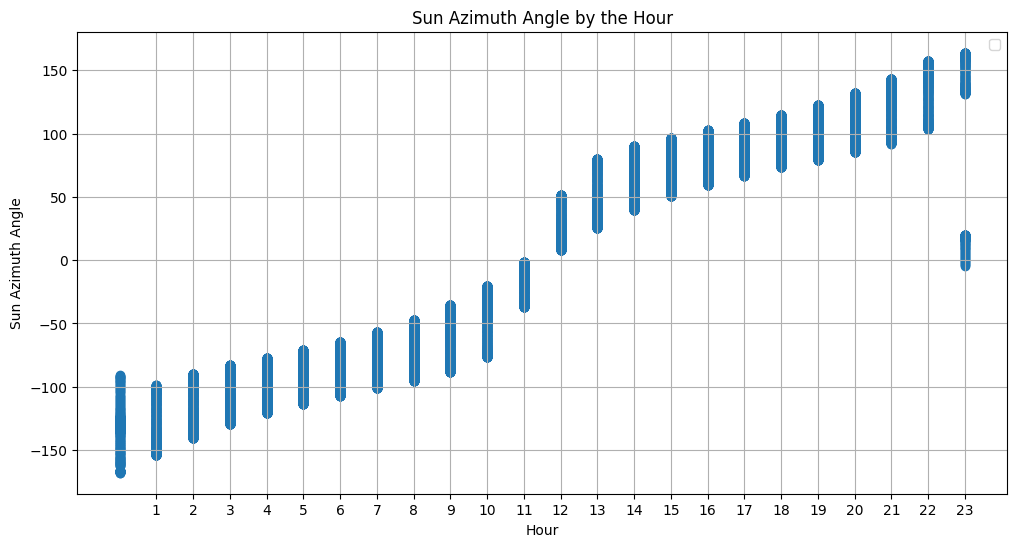

In [139]:
# Calculating the sun azimuth angle by the hour
sun_azimuth_angle_by_hour = energy[["hour","sun_azimuth_angle"]]

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the scatter plot for sun azimuth angle by hour
plt.scatter(sun_azimuth_angle_by_hour["hour"], sun_azimuth_angle_by_hour["sun_azimuth_angle"])

# Plot labels
plt.xlabel("Hour")
plt.ylabel("Sun Azimuth Angle")
plt.title("Sun Azimuth Angle by the Hour")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(1, 24, 1))  # Ensuring all hours are shown on the x-axis
plt.show()

## 3.3 Sun Elevation Angle by the Hour

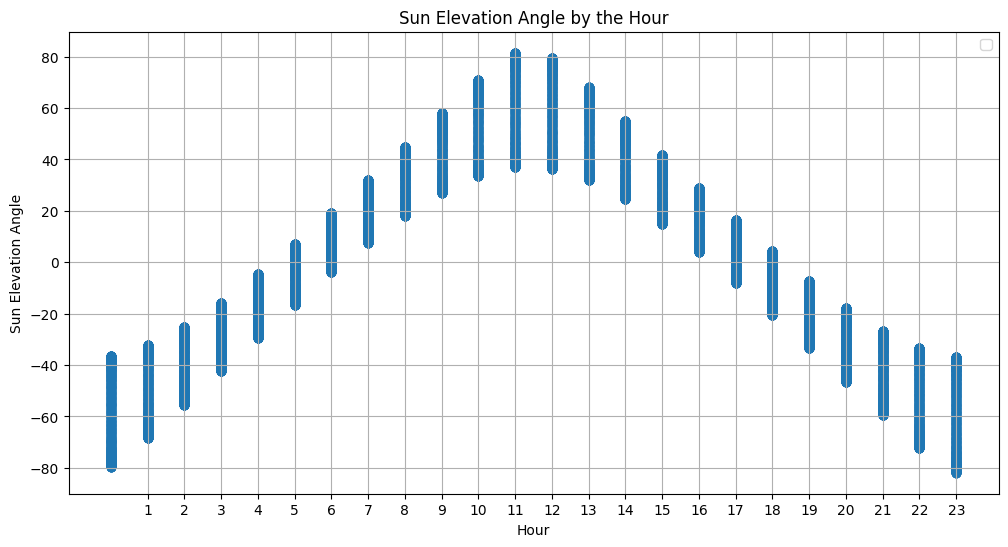

In [140]:
# Calculating the sun elevation angle by the hour
sun_elevation_angle_by_hour = energy[["hour","sun_elevation_angle"]]

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the scatter plot for sun elevation angle by hour
plt.scatter(sun_elevation_angle_by_hour["hour"], sun_elevation_angle_by_hour["sun_elevation_angle"])

# Plot labels
plt.xlabel("Hour")
plt.ylabel("Sun Elevation Angle")
plt.title("Sun Elevation Angle by the Hour")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(1, 24, 1))  # Ensuring all hours are shown on the x-axis
plt.show()

## 3.4 Wind Direction and Wind Speed

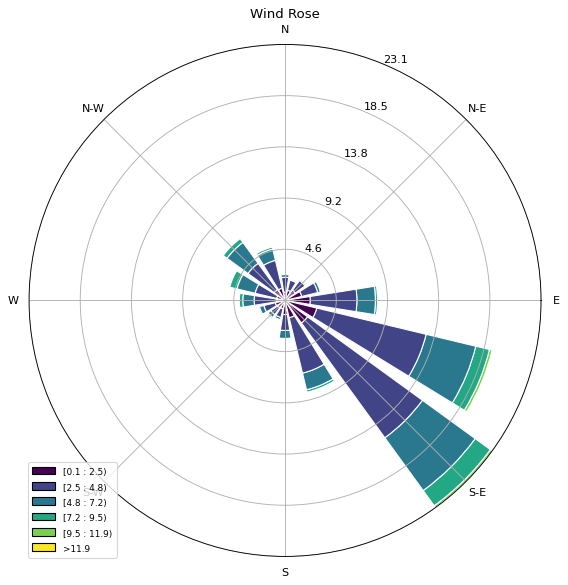

In [141]:
# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(energy["wind_direction"], energy["wind_speed"], normed = True, opening = 0.8, edgecolor = "white")
ax.set_legend()
plt.title("Wind Rose")
plt.show()

## 3.5 Thin Film Energy Output by the Month

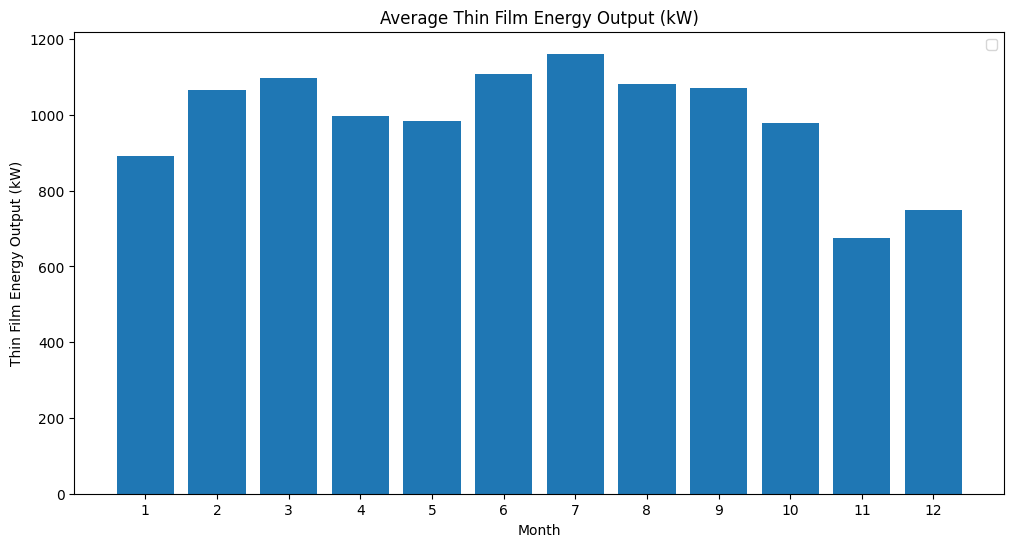

In [142]:
# Calculating the thin film energy output by the month
thin_film_by_month = energy.groupby("month")[["thin_film"]].mean().reset_index()

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the bar plot for thin film energy output by the month
plt.bar(thin_film_by_month["month"], thin_film_by_month["thin_film"])

# Plot labels
plt.xlabel("Month")
plt.ylabel("Thin Film Energy Output (kW)")
plt.title("Average Thin Film Energy Output (kW)")
plt.legend()
plt.xticks(np.arange(1, 13, 1))  # Ensuring all months are shown on the x-axis
plt.show()

## 3.6 Polycrystalline Energy Output by the Month

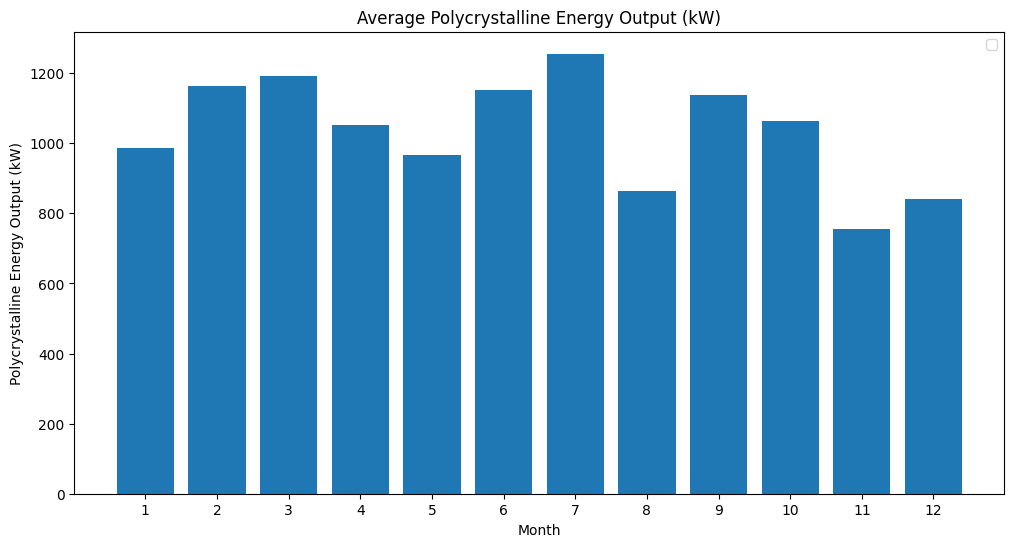

In [143]:
# Calculating the polycrystalline energy output by the month
polycrystalline_by_month = energy.groupby("month")[["polycrystalline"]].mean().reset_index()

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the bar plot for polycrystalline energy output by the month
plt.bar(polycrystalline_by_month["month"], polycrystalline_by_month["polycrystalline"])

# Plot labels
plt.xlabel("Month")
plt.ylabel("Polycrystalline Energy Output (kW)")
plt.title("Average Polycrystalline Energy Output (kW)")
plt.legend()
plt.xticks(np.arange(1, 13, 1))  # Ensuring all months are shown on the x-axis
plt.show()

## 3.7 Heatmap

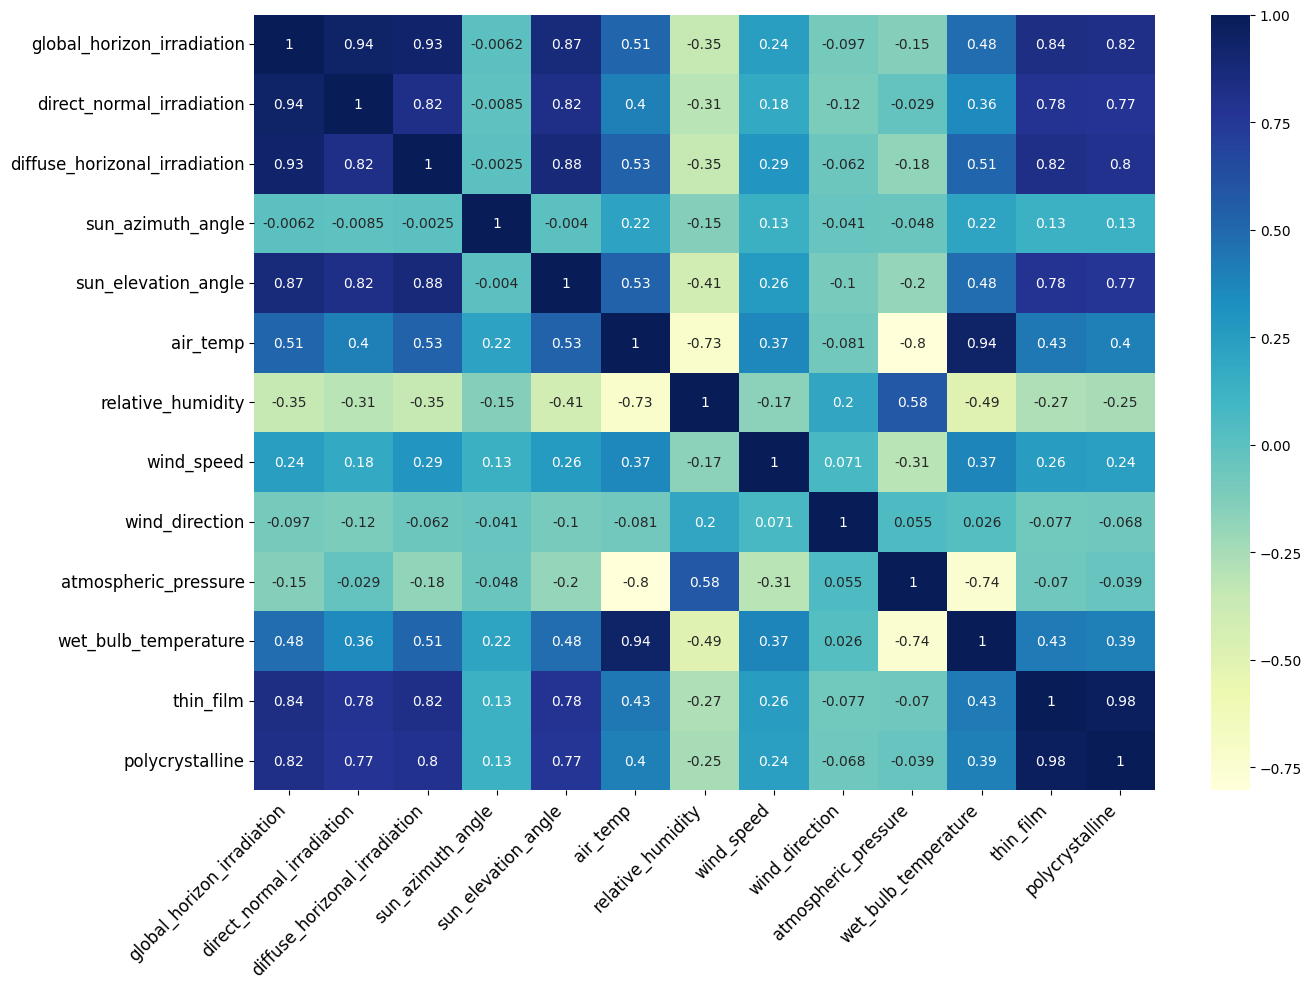

In [144]:
# Define correlation
correlation = energy[["global_horizon_irradiation", "direct_normal_irradiation","diffuse_horizonal_irradiation",
                    "sun_azimuth_angle","sun_elevation_angle","air_temp","relative_humidity", "wind_speed","wind_direction",
                    "atmospheric_pressure","wet_bulb_temperature", "thin_film","polycrystalline"]]

# Figure size
plt.figure(figsize = (14, 10))

# Plot labels
sns.heatmap(correlation.corr(), cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()